# Analiza receptov 

To je _projektna_ naloga  


In [721]:
import pandas as pd
import os.path
pd.options.display.max_rows = 10

%matplotlib inline

recepti_vse = pd.read_csv(os.path.join("obdelani-podatki", "recepti.csv"))
recepti = recepti_vse.drop(columns = ["sestavine", "opis"])
kategorije = pd.read_csv(os.path.join("obdelani-podatki", "kategorije.csv"))
kulinarike = pd.read_csv(os.path.join("obdelani-podatki", "kulinarike.csv"))
oznake = pd.read_csv(os.path.join("obdelani-podatki", "oznake.csv"))


## <span style="color:yellow">TEKMOVANJE RECEPTOV</span>


> _“According to the National Academy of Sciences, current recommendations for healthy adults 
suggest a diet with 10 to 35 percent of calories from protein, 20 to 35 percent from fat, and 45 to 65 percent from carbohydrates.”_

<sup> <span style="color:gray">Vir:  https://www.healthyforlifemeals.com/blog/why-macronutrients-are-important </span><sup>


Po naši naivni formuli bo najbolši recept tisti, pri katerem priprava jedi porabi največ 30 minut in 
ima najbolj raznoliko hranilno sestavo. Iz zgornjega vira določimo našo idealno hranilno sestavo: 
> **ogljikovi_hidrati : mascobe : beljakovine** = 50:25:25 = **2:1:1**  

Receptom bomo glede na te pogoje pripisali kazenske točke, s pomočjo teh pa bomo lahko kategorije razvrstili od najboljše do najslabše.

<sup><span style="color:gray">Pri računanju zaradi preglednosti preimenujemo kolicine ogljikovi_hidrati, mascobe, beljakovine v OH, M, B</span><sup>



**KRTITERIJ ZA KAZENSKE TOČKE:**
1. M + B = OH oz. k1 = OH  / (M+B) = 1
2. k2 = M/B = 1 
3. skupni_cas = 30min

5% oz. 5 min odmika od idealne vrednosti prinese 1KT.        
Če je skupni čas krajši od 30 min nam lahko prinese "negativne KT", in s tem zmanjša skupne KT, saj nam je čas bolj pomemben kot uravnoteženost hranilnih snovi.


##### <span style="color:yellow">Izračun kazenskih točk za recepte</span> 

Pripavimo podatke, ki jih bomo potrebovali za formulo kazenskih točk.

In [722]:
recepti["M+B"] = recepti.mascobe + recepti.beljakovine
recepti["k1"] = recepti.ogljikovi_hidrati/ (recepti.mascobe + recepti.beljakovine)
recepti["k2"] = recepti.mascobe / recepti.beljakovine
recepti["skupni_cas"] = recepti.cas_priprave + recepti.cas_kuhanja

In [723]:
recepti["KT1"] = abs(1 - recepti["k1"]) * 100 // 5
recepti["KT2"] = abs(1 - recepti["k2"]) * 100 // 5
recepti["KT3"] = (recepti.skupni_cas - 30) // 5

recepti["KT"] = recepti["KT1"] + recepti["KT2"] + recepti["KT3"]

recepti.round(2)

,id_recepta,ime_recepta,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,M+B,k1,k2,skupni_cas,KT1,KT2,KT3,KT
0,1,Pepperoni Pizza Bites,10,30,4,286.0,31.0,9.5,18.0,27.5,1.13,0.53,40,2.0,9.0,2,13.0
1,2,Crustless Potato Jalapeño Quiche,10,50,6,207.0,12.0,12.5,11.5,24.0,0.50,1.09,60,10.0,1.0,6,17.0
2,3,Perfect Baked Potato Recipe,5,55,4,157.0,36.0,0.5,4.0,4.5,8.00,0.12,60,140.0,17.0,6,163.0
3,8,Baked Chicken Breasts,5,30,4,271.0,5.0,9.0,40.0,49.0,0.10,0.22,35,17.0,15.0,1,33.0
4,10,Spaghetti Squash Crust Pizza,30,30,2,303.0,18.0,17.0,28.0,45.0,0.40,0.61,60,12.0,7.0,6,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,205,Raspberry Yogurt Popsicles,15,0,10,71.0,11.0,2.5,2.5,5.0,2.20,1.00,15,24.0,0.0,-3,21.0
134,208,Chocolate Zucchini Bread,20,55,16,190.5,28.0,8.0,4.0,12.0,2.33,2.00,75,26.0,20.0,9,55.0
135,209,Spaghetti with Sauteed Chicken and Grape Tomatoes,5,25,4,330.0,48.0,7.0,25.0,32.0,1.50,0.28,30,10.0,14.0,0,24.0
136,210,Easy Blueberry Buttermilk Cake,20,30,18,168.0,33.0,2.9,3.1,6.0,5.50,0.94,50,90.0,1.0,4,95.0


Za občutek si oglejmo, kako so glede ne podatke določene KT.

<AxesSubplot:xlabel='skupni_cas', ylabel='KT3'>

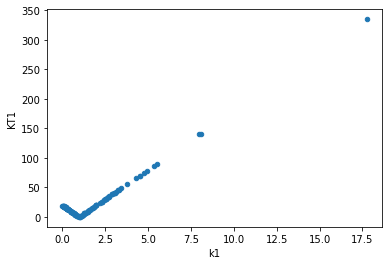

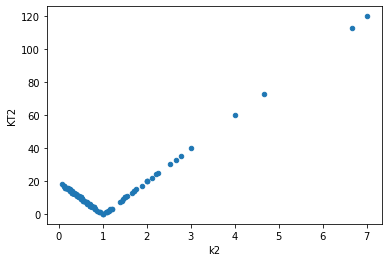

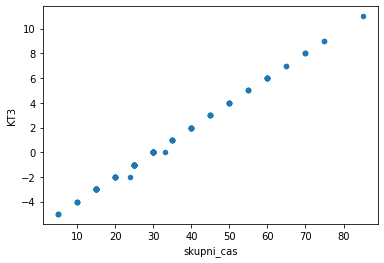

In [724]:
recepti.plot.scatter(x="k1", y="KT1")
recepti.plot.scatter(x="k2", y="KT2")
recepti.plot.scatter(x="skupni_cas", y="KT3")

<span style="color:yellow">Analiza povprečja</span> 

In [725]:
recepti[["KT1", "KT2", "KT3", "KT"]].mean()

KT1    22.840580
KT2    13.260870
KT3     0.586957
KT     36.688406
dtype: float64

Opazimo, da recepti v povprečju največ KT dobijo v 1. točki in najmanj v 3. točki. Poglejmo si povprečja po točkah bolj podrobno.

<span style="color:yellow">1. točka</span> 

In [726]:
recepti[[ "ogljikovi_hidrati", "M+B", "k1", "KT1"]].mean()

ogljikovi_hidrati    22.536232
M+B                  26.437681
k1                    1.575334
KT1                  22.840580
dtype: float64

Iz povprečja koeficienta k1 bi lahko sklepali da je v receptih več OH kot B in M skupaj. To pa ne sovpada z povprečjem OH in M+B ki smo ga izračunali posebaj, saj to kaže da je v povprečju OH manj.

Ker velja da povprečje kazenskih točk ni enako kot kazenske točke povrečja si oglejmo njuno odstopanje.         
Povprečno vrednost KT lahko izračunamo na 3.načine:         
1. Popvrečje KT
2. KT povprečja
3. KT iz povprečnega koeficienta

In [727]:
abs(1 -  recepti.ogljikovi_hidrati.mean() / recepti["M+B"].mean()) * 100 // 5

2.0

In [728]:
abs(1 - recepti["k1"].mean()) * 100 // 5

11.0

Dobimo 3 možnosti: 23, 2, 11.
Njihovo povrečje pa je 12.

Iz tega lahko sklepamo da morda naši recepti posamezno niso dobro uravnoteženi glede vsebnosti OH in (B + M), je pa dobro uravnotežena celotna zbirka.      
2KT pomenita približno 10% odstopanje.      
 Če bi se držali jedilnika iz te zbirke receptov dlje časa, bi bila naša prehrana glede na prvo točko kriterija ustrezna.

<span style="color:yellow">2. točka</span> 


In [729]:
recepti[["mascobe", "beljakovine", "k2", "KT2"]].mean()

mascobe         8.865217
beljakovine    17.572464
k2              0.895311
KT2            13.260870
dtype: float64

Tukaj pa opazimo ravno obratno kot v točki 1. Koeficient k2 kaže dobro razmerje med M in B, saj je odmik od idealne vrednosti 1 le okoli 10%.       
Povprečja M in B pa ne kažejo ujemanja.

In [730]:
abs(1 -  recepti.mascobe.mean() / recepti.beljakovine.mean()) * 100 // 5

9.0

In [731]:
abs(1 - recepti["k1"].mean()) * 100 // 5

11.0

Dobimo 3 možnosti: 13, 9, 11.       
Njihovo povprečje je 11, kar je za 1 manj kot v pri prvi točki kriterija.   

Vendar pa so tu za razliko od prejšnje točke vse tri možnosti dokaj blizu, zato tudi najmanja izmed treh pokaže večje odstopanje.
Torej bi imel jedilnik iz te zbirke v povprečju manj maščob kot beljakovin.

Jedilnik bi lahko popravili tako, da bi večkrat izbrali recepte, ki imajo k2 večji od 1.

In [732]:
recepti_po_k2 = recepti[
    recepti["k2"] > 1.0
]

Lahko se odločimo da bomo večkrat izbrali kakšen tak recept, ali pa ga izberemo take z čim večjim k2 in lahko to storimo bolj poredko.      
Oglejmo si take primere, ki bodo poleg tega čim bolj usterzni tudi po ostalih točkah kriterija.

In [733]:
recepti_po_k2.sort_values(
    "k2", ascending=False
).sort_values(
    "KT"
).head(
    10
).drop(
    columns = ["M+B", "k1"]
).round(
    2
)

,id_recepta,ime_recepta,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,k2,skupni_cas,KT1,KT2,KT3,KT
51,87,Watermelon Feta Salad,15,0,12,85.0,9.5,4.0,3.5,1.14,15,5.0,2.0,-3,4.0
132,204,Skillet Mexican Zucchini,5,10,4,102.0,8.0,6.0,5.0,1.20,15,5.0,3.0,-3,5.0
100,155,Sauteed Collard Greens with Bacon,5,15,4,73.0,7.0,4.5,3.0,1.50,20,1.0,10.0,-2,9.0
66,108,Asparagus and Feta Tartlet with Phyllo Crust,15,35,6,91.0,7.5,5.0,4.5,1.11,50,4.0,2.0,4,10.0
80,124,Skinny Caesar Dressing,5,0,4,91.0,2.5,6.5,6.0,1.08,5,16.0,1.0,-5,12.0
18,31,Baked Brie Phyllo Cups,8,7,15,60.0,6.5,3.0,2.0,1.50,15,6.0,10.0,-3,13.0
73,116,Quick Spicy Peanut Palmini Noodle Stir Fry,5,10,1,414.0,26.5,26.5,17.0,1.56,15,7.0,11.0,-3,15.0
27,46,Pumpkin Overnight Oats in a Jar,10,0,1,269.0,40.5,12.0,10.0,1.20,10,16.0,3.0,-4,15.0
1,2,Crustless Potato Jalapeño Quiche,10,50,6,207.0,12.0,12.5,11.5,1.09,60,10.0,1.0,6,17.0
102,158,"Roasted Delicata Squash with Burrata, Pomegran...",15,25,6,165.0,14.0,11.0,5.0,2.20,40,2.0,24.0,2,28.0


<span style="color:yellow">3. točka</span> 


In [734]:
recepti[["skupni_cas", "KT3"]].mean()

skupni_cas    32.985507
KT3            0.586957
dtype: float64

Naša zbirka receptov ugaja času ki smo ga pripravljeni vložiti v pripravo obrokov. V povprečju recept od nas zahteva 2-3 minut več kot 30 minut.

<span style="color:yellow">Zaključek:</span> 

Glede na našo naivno formulo za najbolše recepte so v naši zbirki najboljši trije:

In [735]:
recepti.sort_values("k2", ascending=False).sort_values("KT").head(3).round(2)

,id_recepta,ime_recepta,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,M+B,k1,k2,skupni_cas,KT1,KT2,KT3,KT
21,37,Huevos Rancheros,5,10,2,414.0,42.0,18.5,22.5,41.0,1.02,0.82,15,0.0,3.0,-3,0.0
68,110,Protein PB & J Smoothie Bowl,5,0,1,268.0,30.5,11.0,14.5,25.5,1.20,0.76,5,3.0,4.0,-5,2.0
51,87,Watermelon Feta Salad,15,0,12,85.0,9.5,4.0,3.5,7.5,1.27,1.14,15,5.0,2.0,-3,4.0


Najslabši trije pa:

In [736]:
recepti.sort_values("k2", ascending=False).sort_values("KT").tail(3).round(2)

,id_recepta,ime_recepta,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,M+B,k1,k2,skupni_cas,KT1,KT2,KT3,KT
2,3,Perfect Baked Potato Recipe,5,55,4,157.0,36.0,0.5,4.0,4.5,8.00,0.12,60,140.0,17.0,6,163.0
24,41,Apple Cobbler,20,50,8,215.0,44.5,4.0,1.5,5.5,8.09,2.67,70,141.0,33.0,8,182.0
97,151,Baked Bananas,5,15,1,137.0,35.5,0.5,1.5,2.0,17.75,0.33,20,335.0,13.0,-2,346.0


## <span style="color:yellow">TEKMOVANJE KATEGORIJ</span>

In [737]:
recepti_z_kategorijami = pd.merge(recepti, kategorije)
recepti_po_kategorijah = recepti_z_kategorijami.groupby("kategorija")

Za začetek si poglejmo v katere kategorije so recepti razdeljeni, in primerjavo nekaterih osnovnih podatkov po kategorijah.

In [738]:
kategorije = recepti_z_kategorijami.kategorija.unique().tolist()
kategorije

['Appetizer',
 'Lunch',
 'School Lunch',
 'Snack',
 'Breakfast',
 'Brunch',
 'Dinner',
 'Side Dish',
 'Dessert',
 'Salad',
 'Meal Prep',
 'condiment',
 'cookies',
 'Soup']

In [739]:
st = recepti_po_kategorijah.size().sort_values()
st

kategorija
Soup             1
condiment        1
cookies          2
School Lunch     3
Salad            9
                ..
Brunch          21
Side Dish       22
Breakfast       24
Lunch           56
Dinner          75
Length: 14, dtype: int64

<AxesSubplot:xlabel='kategorija'>

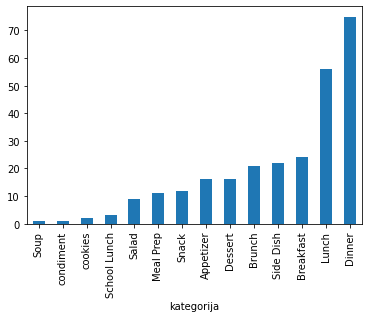

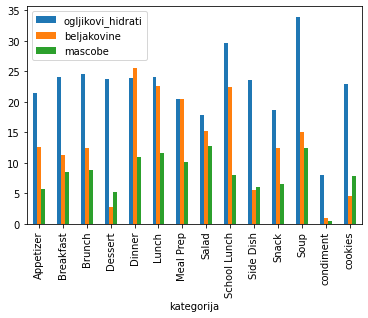

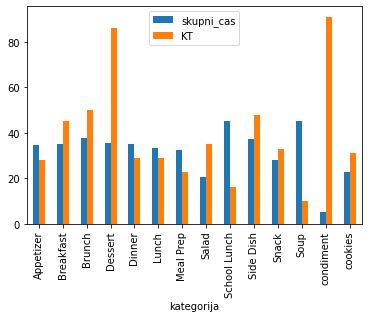

In [740]:
recepti_po_kategorijah.size().sort_values().plot.bar()
recepti_po_kategorijah.mean()[["ogljikovi_hidrati", "beljakovine", "mascobe"]].plot.bar()
recepti_po_kategorijah.mean()[["skupni_cas", "KT"]].plot.bar()



In [741]:
k = recepti_po_kategorijah.mean().drop(columns=["id_recepta"]).round(2).sort_values("KT")
k

,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,M+B,k1,k2,skupni_cas,KT1,KT2,KT3,KT
kategorija,,,,,,,,,,,,,,,
Soup,15.00,30.00,5.00,293.00,34.00,12.50,15.00,27.50,1.24,0.83,45.00,4.00,3.00,3.00,10.00
School Lunch,18.33,26.67,4.00,282.33,29.67,8.00,22.50,30.50,0.98,0.38,45.00,1.67,11.67,3.00,16.33
Meal Prep,10.45,21.82,4.45,250.50,20.50,10.09,20.45,30.55,0.91,0.59,32.27,13.18,8.91,0.45,22.55
Appetizer,14.25,20.44,6.25,187.69,21.46,5.68,12.66,18.34,1.49,0.62,34.69,16.31,10.94,0.94,28.19
Dinner,11.45,23.71,4.48,296.74,23.91,10.91,25.58,36.49,1.00,0.52,35.16,16.85,10.93,1.01,28.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Breakfast,12.08,22.92,6.21,210.54,24.06,8.42,11.22,19.65,2.45,0.89,35.00,36.62,7.29,1.00,44.92
Side Dish,10.68,26.36,5.55,162.67,23.64,5.94,5.61,11.55,2.38,1.40,37.05,29.45,16.86,1.41,47.73
Brunch,13.33,24.29,6.57,221.55,24.55,8.79,12.35,21.14,2.57,0.99,37.62,40.19,8.43,1.52,50.14


Najboljše tri kategorije po našem kriteriju so:

In [742]:
k.head(3)

,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,M+B,k1,k2,skupni_cas,KT1,KT2,KT3,KT
kategorija,,,,,,,,,,,,,,,
Soup,15.00,30.00,5.00,293.00,34.00,12.50,15.00,27.50,1.24,0.83,45.00,4.00,3.00,3.00,10.00
School Lunch,18.33,26.67,4.00,282.33,29.67,8.00,22.50,30.50,0.98,0.38,45.00,1.67,11.67,3.00,16.33
Meal Prep,10.45,21.82,4.45,250.50,20.50,10.09,20.45,30.55,0.91,0.59,32.27,13.18,8.91,0.45,22.55


Najslabše pa:

In [743]:
k.tail(3)

,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,M+B,k1,k2,skupni_cas,KT1,KT2,KT3,KT
kategorija,,,,,,,,,,,,,,,
Brunch,13.33,24.29,6.57,221.55,24.55,8.79,12.35,21.14,2.57,0.99,37.62,40.19,8.43,1.52,50.14
Dessert,14.25,21.06,11.19,141.31,23.78,5.20,2.78,7.98,4.20,1.92,35.31,63.69,21.38,1.06,86.12
condiment,5.00,0.00,4.00,36.50,8.00,0.50,1.00,1.50,5.33,0.50,5.00,86.00,10.00,-5.00,91.00


Ker kategorij ni veliko (le 14), si oglejmo najboljši in najslabši recept za vsako.

In [744]:
najslabši, najboljši = [], []
for kat in kategorije:
    r = recepti_po_kategorijah[["kategorija", "ime_recepta", "KT"]].get_group(kat)
    najslabši.append(r.nlargest(1, "KT"))
    najboljši.append(r.nsmallest(1, "KT"))


In [745]:
najboljši

[    kategorija                                   ime_recepta    KT
 121  Appetizer  Asparagus and Feta Tartlet with Phyllo Crust  10.0,
     kategorija                                        ime_recepta   KT
 253      Lunch  Portobello Mushroom Burger with Mozzarella, Ro...  8.0,
      kategorija            ime_recepta    KT
 2  School Lunch  Pepperoni Pizza Bites  13.0,
   kategorija            ime_recepta    KT
 3      Snack  Pepperoni Pizza Bites  13.0,
    kategorija       ime_recepta   KT
 39  Breakfast  Huevos Rancheros  0.0,
    kategorija       ime_recepta   KT
 40     Brunch  Huevos Rancheros  0.0,
    kategorija       ime_recepta   KT
 41     Dinner  Huevos Rancheros  0.0,
     kategorija               ime_recepta   KT
 257  Side Dish  Skillet Mexican Zucchini  5.0,
     kategorija                 ime_recepta    KT
 258    Dessert  Raspberry Yogurt Popsicles  21.0,
    kategorija            ime_recepta   KT
 89      Salad  Watermelon Feta Salad  4.0,
     kategorija         

In [746]:
najslabši

[   kategorija          ime_recepta    KT
 99  Appetizer  Pico de Gallo Salsa  91.0,
   kategorija                  ime_recepta     KT
 9      Lunch  Perfect Baked Potato Recipe  163.0,
        kategorija             ime_recepta    KT
 216  School Lunch  Chicken Parmesan Rolls  21.0,
     kategorija          ime_recepta    KT
 101      Snack  Pico de Gallo Salsa  91.0,
     kategorija    ime_recepta     KT
 188  Breakfast  Baked Bananas  346.0,
     kategorija    ime_recepta     KT
 189     Brunch  Baked Bananas  346.0,
   kategorija                  ime_recepta     KT
 8     Dinner  Perfect Baked Potato Recipe  163.0,
    kategorija                  ime_recepta     KT
 10  Side Dish  Perfect Baked Potato Recipe  163.0,
     kategorija    ime_recepta     KT
 190    Dessert  Baked Bananas  346.0,
     kategorija                      ime_recepta     KT
 120      Salad  Navel Orange Salad with Avocado  110.0,
     kategorija                             ime_recepta    KT
 204  Meal Prep  Y

Za zabavo si posebaj poglejmo kategorijo sladic. K tej pridužimo še piškote.

In [747]:
dessert = recepti_po_kategorijah.get_group("Dessert")
cookies = recepti_po_kategorijah.get_group("cookies")
sladice = pd.concat([cookies, dessert])

<AxesSubplot:xlabel='kalorije', ylabel='KT'>

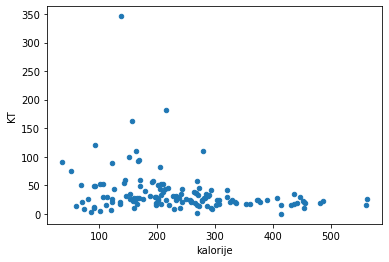

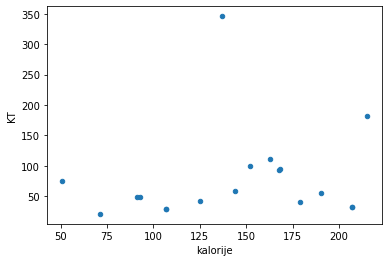

In [748]:
recepti.plot.scatter(x="kalorije", y="KT")
sladice.plot.scatter(x="kalorije", y="KT")

## <span style="color:yellow">ANALIZA KULINARIK</span>

Podobno kot za kategorije naredimo tudi za kulinarike.

In [749]:
recepti_z_kulinarikami = pd.merge(recepti, kulinarike)
recepti_po_kulinarikah = recepti_z_kulinarikami.groupby("kulinarika")
seznam_kulinarike = recepti_z_kulinarikami.kulinarika.unique().tolist()


In [750]:
pd.options.display.max_rows = 30
recepti_po_kulinarikah.size().sort_values()

kulinarika
Indian            1
Thai              1
Spanish           1
Japanese          1
Vietnamese        1
Greek             1
portuguese        1
Colombian         1
Chilean           1
Cajun             1
French            2
Chinese           2
Latin             2
Tex Mex           2
Cuban             3
Mediterranean     4
Mexican           4
Asian             7
Italian          21
American         88
dtype: int64

Ker je velika večina naših receptov amerških in nimamo dobre baze za primerjavo različnih kulinarik, si podatke oglejmo le za občutek.

<AxesSubplot:xlabel='kulinarika'>

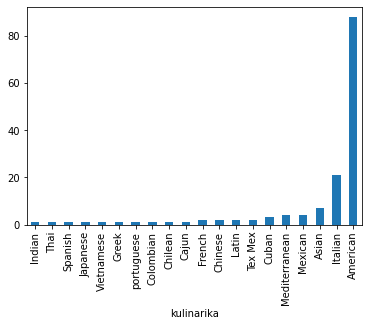

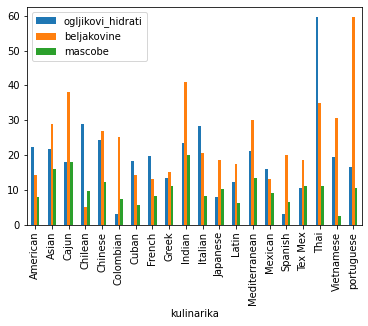

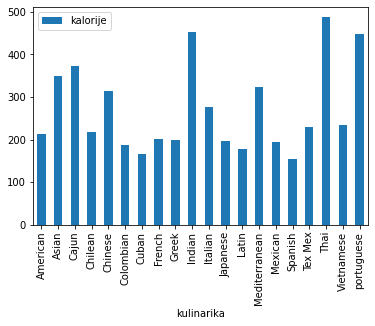

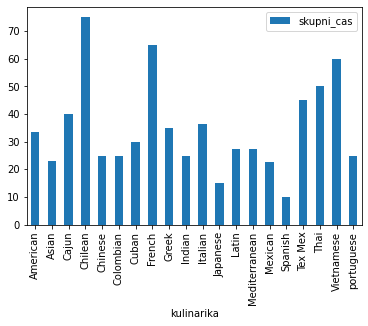

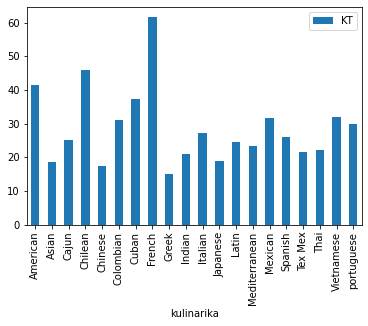

In [751]:
recepti_po_kulinarikah.size().sort_values().plot.bar()
recepti_po_kulinarikah.mean()[["ogljikovi_hidrati", "beljakovine", "mascobe"]].plot.bar()
recepti_po_kulinarikah.mean()[["kalorije"]].plot.bar()
recepti_po_kulinarikah.mean()[["skupni_cas"]].plot.bar()
recepti_po_kulinarikah.mean()[["KT"]].plot.bar()

In [752]:
recepti_po_kulinarikah.mean().drop(columns=["id_recepta"]).round(2).sort_values("KT")

,cas_priprave,cas_kuhanja,st_porcij,kalorije,ogljikovi_hidrati,mascobe,beljakovine,M+B,k1,k2,skupni_cas,KT1,KT2,KT3,KT
kulinarika,,,,,,,,,,,,,,,
Greek,10.00,25.00,4.00,198.00,13.50,11.00,15.00,26.00,0.52,0.73,35.00,9.00,5.00,1.00,15.00
Chinese,15.00,10.00,4.00,314.80,24.20,12.15,26.80,38.95,0.55,0.48,25.00,8.50,10.00,-1.00,17.50
Asian,12.14,10.71,3.00,349.43,21.64,16.07,29.00,45.07,0.47,0.64,22.86,10.14,9.86,-1.43,18.57
Japanese,15.00,0.00,4.00,197.60,7.90,10.30,18.60,28.90,0.27,0.55,15.00,14.00,8.00,-3.00,19.00
Indian,5.00,20.00,4.00,453.00,23.50,20.00,41.00,61.00,0.39,0.49,25.00,12.00,10.00,-1.00,21.00
Tex Mex,10.00,35.00,6.00,228.50,10.50,11.00,18.50,29.50,0.38,0.73,45.00,12.00,6.50,3.00,21.50
Thai,20.00,30.00,4.00,487.00,59.50,11.00,35.00,46.00,1.29,0.31,50.00,5.00,13.00,4.00,22.00
Mediterranean,13.75,13.75,6.00,323.75,21.00,13.38,30.00,43.38,1.06,0.67,27.50,16.25,7.50,-0.50,23.25
Latin,10.00,17.50,7.00,176.50,12.25,6.10,17.35,23.45,0.79,0.41,27.50,13.50,11.50,-0.50,24.50


In [753]:
pd.options.display.max_rows = 10

## <span style="color:yellow">ANALIZA OZNAK</span>


In [755]:
oznake

,id_recepta,oznaka
0,1,Kid Friendly
1,2,Gluten Free
2,2,Meal Prep Recipes
3,2,Vegetarian Meals
4,3,Dairy Free
...,...,...
486,209,Under 30 Minutes
487,210,Kid Friendly
488,210,Vegetarian Meals
489,213,Gluten Free


In [758]:
recepti_z_oznakami = pd.merge(recepti, oznake)
recepti_po_kulinarikah = recepti_z_oznakami.groupby("oznaka")
seznam_oznake = recepti_z_oznakami.oznaka.unique().tolist()

In [759]:
seznam_oznake

['Kid Friendly',
 'Gluten Free',
 'Meal Prep Recipes',
 'Vegetarian Meals',
 'Dairy Free',
 'Keto Recipes',
 'Low Carb',
 'Under 30 Minutes',
 'Air Fryer',
 'Whole 30 Recipes',
 'Paleo',
 'Freezer Meals',
 'Pressure Cooker Recipes']